Demonstrate how to use a learning rate scheduler in TensorFlow 2 to adaptively reduce the learning rate during training for a regression task.


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
#Generate synthetic regression data
X=np.linspace(0,10,200).reshape(-1,1).astype(np.float32)
y=7*X+5+np.random.randn(*X.shape).astype(np.float32)*2

In [5]:
#Define learning rate schedule
def scheduler(epoch,lr):
    if epoch%20==0 and epoch:
        return lr*0.5
    return lr

In [3]:
model=Sequential([
    Dense(units=1,input_shape=[1])
])

c:\Users\ADARSH\.conda\envs\tf_env\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),loss='mse')

In [6]:
#Use the schedule as a callback
lr_callback=tf.keras.callbacks.LearningRateScheduler(scheduler)

In [7]:
history=model.fit(X,y,epochs=100,callbacks=[lr_callback],verbose=0)

In [8]:
preds=model.predict(X)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step 


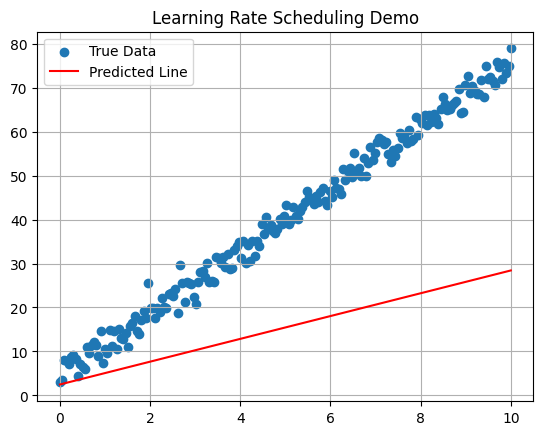

In [10]:
plt.scatter(X, y, label='True Data')
plt.plot(X, preds, color='red', label='Predicted Line')
plt.title("Learning Rate Scheduling Demo")
plt.legend()
plt.grid(True)
plt.show()

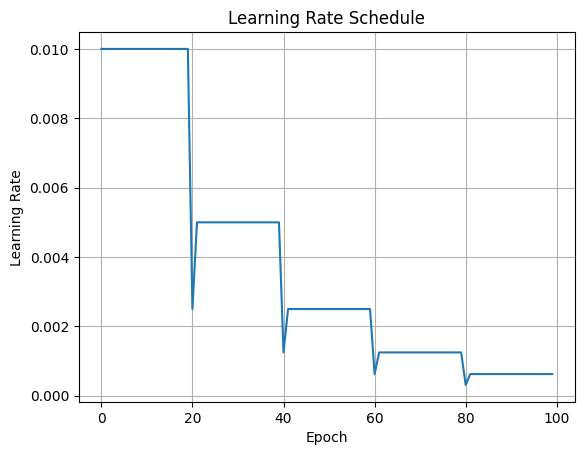

In [11]:
# Visualize the learning rate changes
lrs = [scheduler(epoch, 0.01 * (0.5 ** (epoch // 20))) for epoch in range(100)]
plt.figure()
plt.plot(range(100), lrs)
plt.title("Learning Rate Schedule")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.grid(True)
plt.show()
